In [36]:
#OS to access folders for reading and writing images, cv2 to process the image, plt to display them
#Numpy for having images in array to broadcast, vectorize for parallelizing the process on images

import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from numba import vectorize

In [37]:
#Getting the path to the folder containing the images

path = os.getcwd()
path += '\\archive\\animals\\animals\\'
path

'C:\\Users\\Saatvik Ojas\\Desktop\\Python Projects\\Animal-Silhouette-Classification\\archive\\animals\\animals\\'

In [38]:
#Getting list of folders of different animals in the dataset

classes = os.listdir(path)
classes

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [75]:
imgs = []
for i in range(0, 4*3, 3): #Want 4 images, from 4 different folders, separated by 3 steps
    imgloc = os.listdir(path + classes[i])[i]
    print(imgloc)
    img = cv2.imread(path + classes[i] + "\\" + imgloc, 0) #Reading the image in grayscale and saving it
    imgs.append(img)

02f4b3be2d.jpg
08e665796d.jpg
1a94573fa2.jpg
11883c3dd8.jpg


In [76]:
def displayImages(imgs):
    plt.figure(figsize=(10, 10)) #Plot size is 5x5
    for x in range(len(imgs)):
        plt.subplot(2, 2, x+1) #Subplot in a 2x2 grid, for 4 images
        plt.imshow(imgs[x], cmap='gray') #Display image in grayscale
    plt.show()

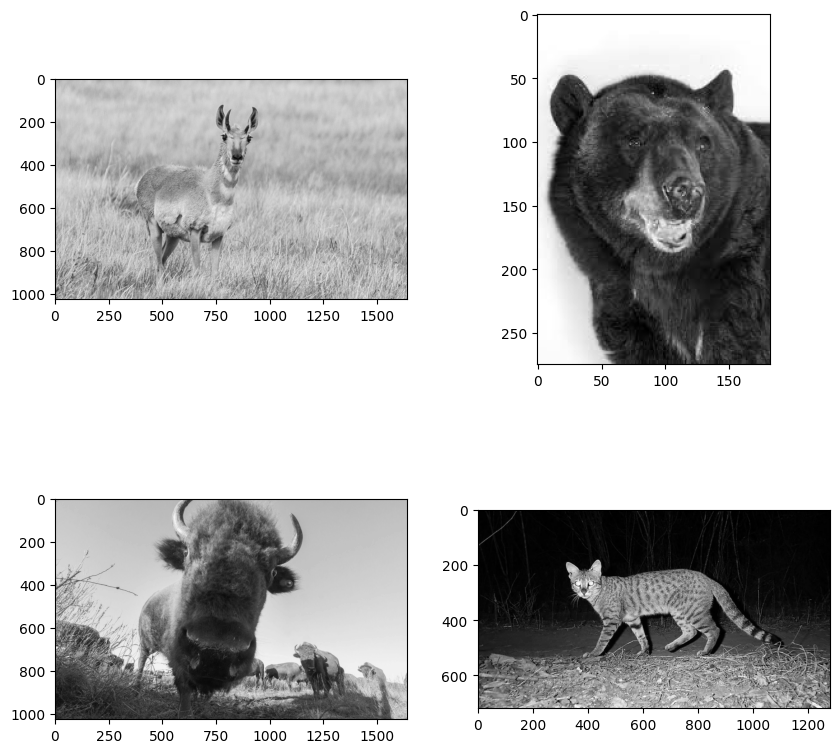

In [77]:
displayImages(imgs)

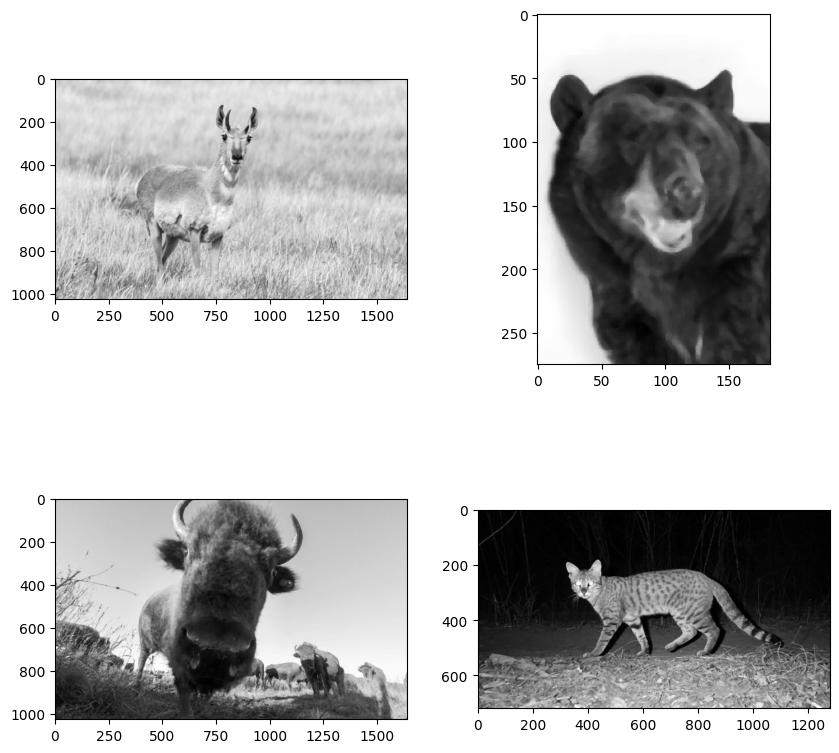

In [78]:
med = []
for i in imgs:
    m = cv2.medianBlur(i, 5) #To remove noise and smoothen image
    med.append(m)

displayImages(med)

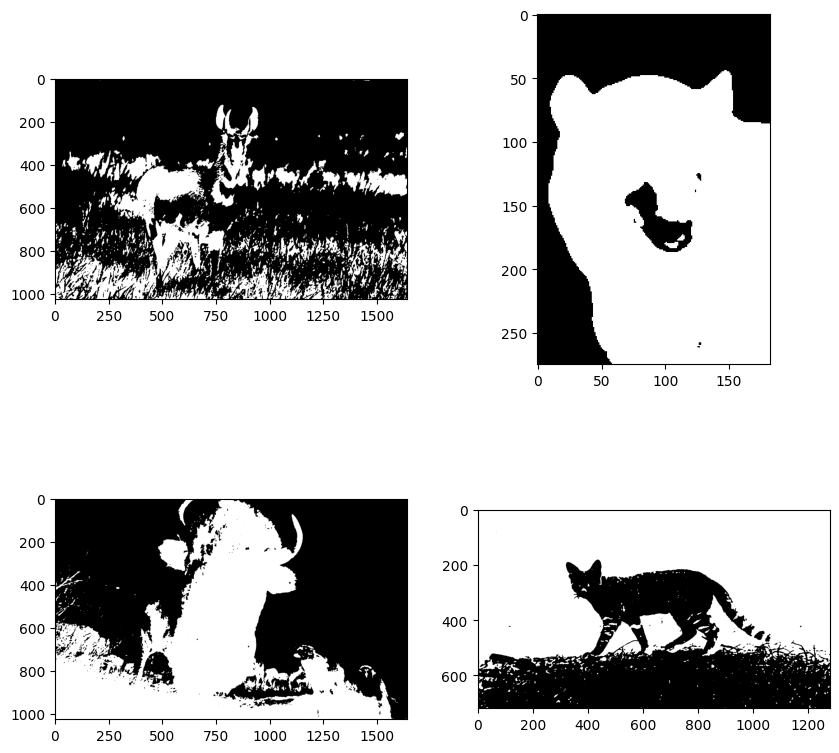

In [79]:
binary = []
for m in med:
    ret, otsu = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    binary.append(otsu)
    
displayImages(binary)

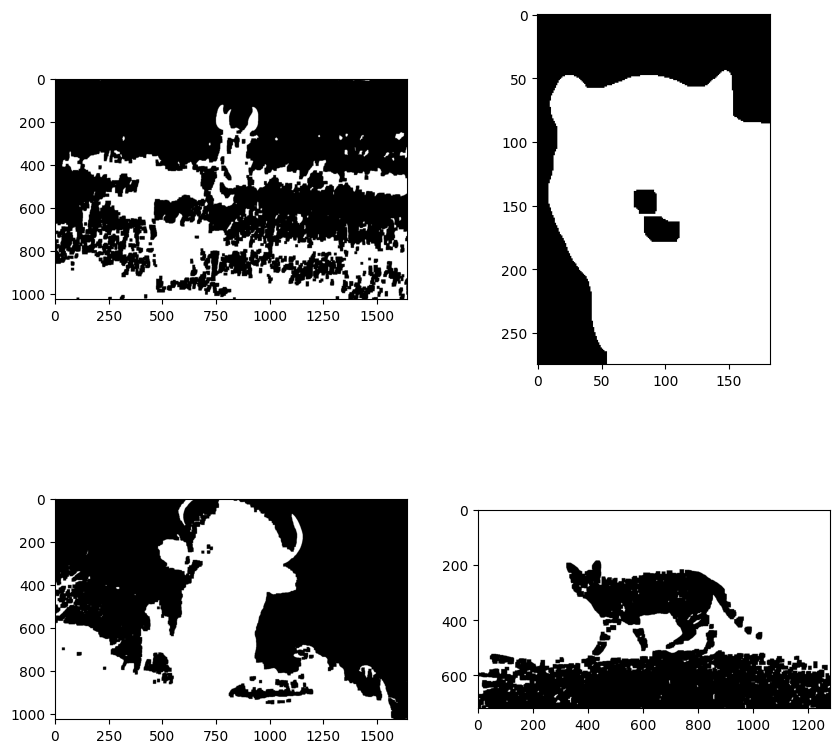

In [80]:
kernel = np.ones((13, 13), np.uint8)

closed = []
for b in binary:
    c = cv2.morphologyEx(b, cv2.MORPH_CLOSE, kernel)
    closed.append(c)
    
displayImages(closed)